# Chicago Energy Benchmarking Analysis

## Step 1: Libraries Required

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter 
import numpy as np 
%matplotlib inline

import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf


---------------------------------------------------------------------------

## Step 2: Import Dataset

In [7]:
df = pd.read_csv('full_import.csv', header=0)
print(df)

       Data Year      ID                            Property Name  \
0           2018  101751                                      NaN   
1           2018  161147                             72 E 11th St   
2           2017  159111        Aurora Chicago Lakeshore Hospital   
3           2016  146897                           Vision Rentals   
4           2016  175120   Polish Roman Catholic Union of America   
...          ...     ...                                      ...   
10703       2017  159897                                Shoreland   
10704       2016  102452                       Regenstein Library   
10705       2017  158219                        Chicago Swissotel   
10706       2016  227642  Granville Beach Condominium Association   
10707       2017  174260                  Bridgeview Bank- Uptown   

      Reporting Status                Address ZIP Code  Chicago Energy Rating  \
0               Exempt  7500 S SOUTH SHORE DR    60649                    NaN   
1        

---------------------------------------------------------------------------

## Step 3: Data Cleansing

In [8]:
#Identify the unique property type values that currently exist within the data frame. 
print(df['Primary Property Type'].unique())

[nan 'Other - Specialty Hospital' 'Multifamily Housing' 'Office'
 'Other - Lodging/Residential' 'Strip Mall' 'Library' 'Other'
 'K-12 School' 'Retail Store' 'Residence Hall/Dormitory'
 'Hospital (General Medical & Surgical)' 'Museum' 'Performing Arts'
 'Mixed Use Property' 'College/University' 'Other - Recreation' 'Hotel'
 'Laboratory' 'Senior Care Community' 'Residential Care Facility'
 'Enclosed Mall' 'Supermarket/Grocery Store' 'Financial Office'
 'Automobile Dealership' 'Wholesale Club/Supercenter' 'Medical Office'
 'Courthouse' 'Ice/Curling Rink' 'Other - Mall' 'Pre-school/Daycare'
 'Other - Entertainment/Public Assembly' 'Worship Facility'
 'Fitness Center/Health Club/Gym' 'Adult Education' 'Bank Branch'
 'Repair Services (Vehicle, Shoe, Locksmith, etc.)'
 'Outpatient Rehabilitation/Physical Therapy' 'Social/Meeting Hall'
 'Movie Theater' 'Other - Public Services' 'Ambulatory Surgical Center'
 'Lifestyle Center' 'Convention Center' 'Prison/Incarceration'
 'Not Available' 'Other -

In [9]:
#Remove unrelated property types

df = df.loc[~df['Primary Property Type'].isin(['Other - Specialty Hospital', 'Multifamily Housing', 'Other - Lodging/Residential',
 'Strip Mall', 'Library', 'Other', 'K-12 School', 'Retail Store',
 'Residence Hall/Dormitory', 'Hospital (General Medical & Surgical)',
 'Mixed Use Property', 'College/University',
  'Laboratory', 'Senior Care Community',
 'Residential Care Facility', 'Enclosed Mall', 'Supermarket/Grocery Store'
 'Financial Office', 'Automobile Dealership', 'Wholesale Club/Supercenter',
 'Medical Office', 'Courthouse', 'Other - Mall',
 'Pre-school/Daycare', 
 'Worship Facility', 'Fitness Center/Health Club/Gym', 'Adult Education',
 'Bank Branch', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)',
 'Outpatient Rehabilitation/Physical Therapy', 
'Other - Public Services', 'Ambulatory Surgical Center',
 'Prison/Incarceration',
 'Not Available', 'Other - Education', 'Other - Services',
 'Urgent Care/Clinic/Other Outpatient', 
 'Distribution Center', 'Office', 'Hotel', 'Lifestyle Center', 'Supermarket/Grocery Store', 'Financial Office'])]

#The property types we're looking at are: 'Museum' 'Performing Arts' 'Indoor Arena' 'Stadium (Open)''Other - Recreation''Ice/Curling Rink''Other - Entertainment/Public Assembly''Social/Meeting Hall' 'Movie Theater'  'Convention Center'

#Finally, remove rows that have an NA value for Primary Property type, leaving only the 10 property types above.  
df.dropna(subset = ["Primary Property Type"], inplace=True)


print(df)


       Data Year      ID                 Property Name Reporting Status  \
67          2017  160196  The Art Institute of Chicago        Submitted   
70          2018  175495        House of Blues Chicago        Submitted   
110         2018  250034               Broadway Armory        Submitted   
126         2015  252091         1301 East 47th Street        Submitted   
187         2015  138872         Windy City Fieldhouse        Submitted   
...          ...     ...                           ...              ...   
10586       2017  252126          08270 - Ford City 14        Submitted   
10599       2017  165062             Adler Planetarium        Submitted   
10600       2015  175872                 Piper's Alley        Submitted   
10648       2017  252058             Logan Arts Center        Submitted   
10654       2017  165606    Museum of Contemporary Art        Submitted   

                        Address ZIP Code  Chicago Energy Rating  \
67       111 South Michigan Ave 

In [10]:
#Ensure that variables of interest are numeric. 
df['Electricity Use (kBtu)'] = pd.to_numeric(df['Electricity Use (kBtu)'],errors='coerce')
df['Natural Gas Use (kBtu)'] = pd.to_numeric(df['Natural Gas Use (kBtu)'],errors='coerce')
df['District Steam Use (kBtu)'] = pd.to_numeric(df['District Steam Use (kBtu)'],errors='coerce')
df['District Chilled Water Use (kBtu)'] = pd.to_numeric(df['District Chilled Water Use (kBtu)'],errors='coerce')
df['All Other Fuel Use (kBtu)'] = pd.to_numeric(df['All Other Fuel Use (kBtu)'],errors='coerce')

#It was decided that GHG intensity would be the primary focus of this analysis, as fuel, water, and electricity use are not in terms of intensity, and are largely based solely on the size of the building rather than the environmental decisions made by property owners.    

In [11]:
#Ensure these are the only property types remaining. We are looking for: 'Museum' 'Performing Arts' 'Other - Recreation' 'Ice/Curling Rink''Other - Entertainment/Public Assembly' 'Social/Meeting Hall''Movie Theater' 'Convention Center' 'Indoor Arena' and 'Stadium (Open)'  
print(df['Primary Property Type'].unique())

['Museum' 'Performing Arts' 'Other - Recreation' 'Ice/Curling Rink'
 'Other - Entertainment/Public Assembly' 'Social/Meeting Hall'
 'Movie Theater' 'Convention Center' 'Indoor Arena' 'Stadium (Open)']


In [12]:
#Remove columns that will not be used in this analysis to better visualize dataframe 
del df['Latitude']
del df['Longitude']
del df['Total GHG Emissions (Metric Tons CO2e)']
del df['Location']
del df['ID']
del df['Reporting Status']
del df['Address']
del df['Chicago Energy Rating']
del df['Exempt From Chicago Energy Rating']
del df['Site EUI (kBtu/sq ft)']
del df['Source EUI (kBtu/sq ft)']
del df['Weather Normalized Site EUI (kBtu/sq ft)']
del df['Weather Normalized Source EUI (kBtu/sq ft)']
del df['# of Buildings']
del df['Gross Floor Area - Buildings (sq ft)']
del df['Year Built']
del df['ENERGY STAR Score']


In [13]:
#Below please find the colums that remain in the dataframe (and size of df) for the following property types: 'Museum' 'Performing Arts' 'Other - Recreation' 'Ice/Curling Rink''Other - Entertainment/Public Assembly' 'Social/Meeting Hall''Movie Theater' 'Convention Center' 'Indoor Arena' and 'Stadium (Open)'
print(df.head)

<bound method NDFrame.head of        Data Year                 Property Name ZIP Code   Community Area  \
67          2017  The Art Institute of Chicago    60603             LOOP   
70          2018        House of Blues Chicago    60654  NEAR NORTH SIDE   
110         2018               Broadway Armory    60660        EDGEWATER   
126         2015         1301 East 47th Street    60653          KENWOOD   
187         2015         Windy City Fieldhouse    60647     LOGAN SQUARE   
...          ...                           ...      ...              ...   
10586       2017          08270 - Ford City 14    60652        WEST LAWN   
10599       2017             Adler Planetarium    60605  NEAR SOUTH SIDE   
10600       2015                 Piper's Alley    60610     LINCOLN PARK   
10648       2017             Logan Arts Center    60637         WOODLAWN   
10654       2017    Museum of Contemporary Art    60611  NEAR NORTH SIDE   

      Primary Property Type Water Use (kGal)  Electricity

---------------------------------------------------------------------------

## Step 4) Issues/Hypothesis to Explore 
### Problem Statment: Where should Chicago investors and other monetary supporters of cultural arts and entertainment provide 5M in capital to Chicago cultural and community hubs while simultaneously supporting sustainability initiatives in 2021?
   #### A) Which propety type in the Chicago cultural/entertainment industry produces the lowest median GHG intensity?
   #### B) Which of the businesses within this property type produces the lowest median GHG intensity?

## Step 4a: Identify the most environmentally-friendly (entertainment-related) property type in Chicago

In [14]:
#Descriptive stats grouped by property type for each of the 7 variables being considered: Water Use (kGal), Electricity Use (kBtu), Natural Gas Use (kBtu), District Steam Use (kBtu),District Chilled Water Use (kBtu), All Other Fuel Use (kBtu),GHG Intensity (kg CO2e/sq ft)   
     
    
print(df.groupby('Primary Property Type')["Water Use (kGal)"].describe())
print(df.groupby('Primary Property Type')["Electricity Use (kBtu)"].describe())
print(df.groupby('Primary Property Type')["Natural Gas Use (kBtu)"].describe())
print(df.groupby('Primary Property Type')["District Steam Use (kBtu)"].describe())
print(df.groupby('Primary Property Type')["District Chilled Water Use (kBtu)"].describe())
print(df.groupby('Primary Property Type')["All Other Fuel Use (kBtu)"].describe())
print(df.groupby('Primary Property Type')["GHG Intensity (kg CO2e/sq ft)"].describe())

                                      count unique     top freq
Primary Property Type                                          
Convention Center                         0      0     NaN  NaN
Ice/Curling Rink                          1      1   5,724    1
Indoor Arena                              1      1  12,929    1
Movie Theater                             3      3     987    1
Museum                                    5      5     186    1
Other - Entertainment/Public Assembly     4      4     836    1
Other - Recreation                       14     14   1,286    1
Performing Arts                           5      5   1,477    1
Social/Meeting Hall                       1      1   6,467    1
Stadium (Open)                            0      0     NaN  NaN
                                       count  mean  std  min  25%  50%  75%  \
Primary Property Type                                                         
Convention Center                        0.0   NaN  NaN  NaN  NaN  NaN  Na

Stadium (Open)                         NaN  
                                       count       mean        std   min  \
Primary Property Type                                                      
Convention Center                        5.0  12.326000   0.547613  11.6   
Ice/Curling Rink                         1.0  17.900000        NaN  17.9   
Indoor Arena                             4.0  12.450000  11.146748   2.5   
Movie Theater                           12.0  23.050000   3.694591  17.6   
Museum                                  24.0  15.459583   7.126264   6.2   
Other - Entertainment/Public Assembly   23.0  11.186087   5.279058   4.4   
Other - Recreation                      66.0  11.387879   4.895414   5.1   
Performing Arts                         22.0  34.590909  89.612010   7.0   
Social/Meeting Hall                      9.0  11.655556   4.753449   7.2   
Stadium (Open)                           1.0  14.700000        NaN  14.7   

                                          

### Step 4b: Visual

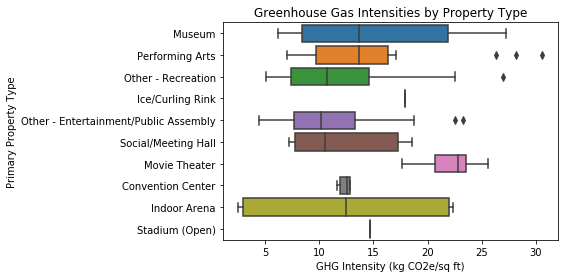

In [15]:
#Remove Outliers
Q1 = df.quantile(q=0.25, axis=0, numeric_only=True, interpolation="linear")

Q3 = df.quantile(q=0.75, axis=0, numeric_only=True, interpolation="linear")

IQR = Q3-Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

#Create Boxplot for GHG intensity
boxplot1 = sns.boxplot(x="GHG Intensity (kg CO2e/sq ft)", y=("Primary Property Type"), data=df_out).set_title('Greenhouse Gas Intensities by Property Type')



### "Other - Entertainment/Public Assembly" spaces have the lowest median green house gas intensities!

---------------------------------------------------------------------------

## Step 4c: Identify the individual properties/ businesses that are the most environmentally friendly.


In [16]:
#Create a new dataframe with only this property type. 
query = "Other - Entertainment/Public Assembly" 

df1 = df[df['Primary Property Type'] == query]


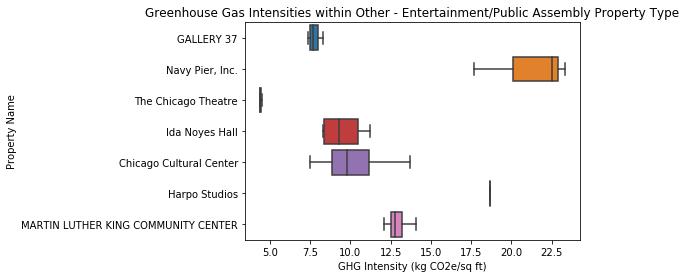

In [17]:
#Note: There were three years of data for each property.
boxplot2 = sns.boxplot(x="GHG Intensity (kg CO2e/sq ft)", y=("Property Name"), data=df1).set_title('Greenhouse Gas Intensities within Other - Entertainment/Public Assembly Property Type')


## The Chicago Theatre has the lowest GHG intensity!

---------------------------------------------------------------------------

# Step 5: Insights
## Other - Entertainment/Public Assembly spaces produce the least intense GHG/sq ft
    - Chicago cultural arts supporters should invest in this realm of the entertainment industry. Note that this property type has the lowest median GHG intensity, although Indoor Arenas do represent the minimum.
 

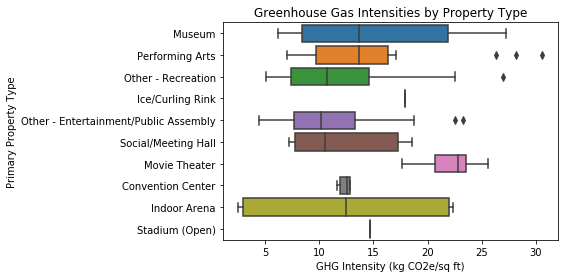

In [18]:
boxplot1 = sns.boxplot(x="GHG Intensity (kg CO2e/sq ft)", y=("Primary Property Type"), data=df_out).set_title('Greenhouse Gas Intensities by Property Type')


## The Chicago Theater is the most environmentally-friendly space in the entertainment realm of Chicago
    - This establishment should be the most monetarily supported.

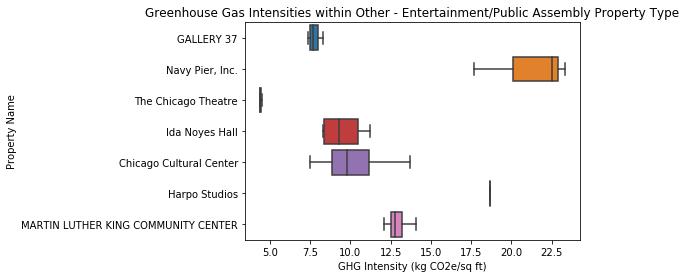

In [19]:
boxplot2 = sns.boxplot(x="GHG Intensity (kg CO2e/sq ft)", y=("Property Name"), data=df1).set_title('Greenhouse Gas Intensities within Other - Entertainment/Public Assembly Property Type')


# Change the Property Name in the second line of code below to check out GHG intensities over time for different companies. 

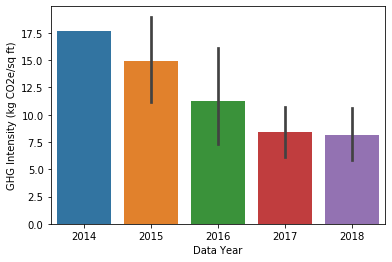

In [23]:
df2 = df1.loc[:, ['Property Name', 'Data Year', 'GHG Intensity (kg CO2e/sq ft)']]

df2[['Property Name', 'Data Year', 'GHG Intensity (kg CO2e/sq ft)']].loc[df2['Property Name'] == 'The Chicago Theater']

sns.barplot(x= 'Data Year', y= 'GHG Intensity (kg CO2e/sq ft)', data=df2)

# Use the function below to print GHG intensities for different companies and different years.

In [47]:
def GHG_Intensity(PropertyName, Year):
    Intensity = df[(df['Property Name']==PropertyName) & (df['Data Year']==Year)]['GHG Intensity (kg CO2e/sq ft)'].to_list()
    return Intensity[0] if len(Intensity) else 'GHG Intensity Not Available'

print(GHG_Intensity('Navy Pier, Inc.', 2016))

22.5
